**Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

The fundamental idea behind ensemble techniques in machine learning is to combine multiple weak or base models to produce a stronger predictive model with improved accuracy and generalization. Bagging (Bootstrap Aggregating) trains models independently on different random subsets of data to reduce variance and overfitting, while boosting trains models sequentially, focusing on correcting predecessors’ errors to reduce bias and strengthen overall performance.

**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

The Random Forest Classifier reduces overfitting by aggregating predictions from multiple decision trees, each trained on random subsets of data and features, leading to variance reduction and better generalization. Two key hyperparameters in this process are the number of estimators (trees) and maximum depth. Increasing estimators enhances stability, while limiting depth prevents individual trees from memorizing noise, improving model robustness.

**Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

Stacking in machine learning is an ensemble technique that combines predictions from multiple different base models (like decision trees, logistic regression, etc.) by training a meta-model to learn how best to integrate these outputs. Unlike bagging and boosting, stacking uses diverse types of models in parallel and trains a final learner on their predictions to improve accuracy. For example, stacking could combine a random forest, SVM, and logistic regression outputs using a meta-model for better classification results.

**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

The Out-of-Bag (OOB) score in Random Forest is an internal performance estimate computed using the samples not included in each tree's bootstrap training set. Since each tree trains on about two-thirds of data, the remaining one-third forms the OOB samples, which serve as a test set for that tree. This approach provides an unbiased model evaluation without needing a separate validation set, saving data and allowing continuous performance monitoring during training.

**Question 5: Compare AdaBoost and Gradient Boosting in terms of:**

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

AdaBoost and Gradient Boosting are both boosting ensemble techniques, but differ in error handling and weight adjustment. AdaBoost re-weights training samples based on previous model errors, enhancing focus on misclassified points by increasing their weights. Gradient Boosting fits each new model on the residual errors using gradient descent to minimize a loss function. AdaBoost typically suits simpler binary classification, while Gradient Boosting excels in flexible regression and classification tasks where complex error landscapes exist.

**Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

CatBoost performs well on categorical features by automatically converting them into numerical values using a process called ordered target statistics, which replaces categories with average target values computed from previous data permutations. This method avoids target leakage and overfitting without extensive preprocessing like one-hot encoding. CatBoost also captures feature combinations, simplifying handling of high-cardinality categorical data and improving model accuracy.

**Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task:**

1. Load the Wine dataset (sklearn.datasets.load_wine()).

2. Split data into 70% train and 30% test.

3. Train a KNN classifier (default K=5) without scaling and evaluate using:

    a. Accuracy
    
    b. Precision, Recall, F1-Score (print classification report)

4. Apply StandardScaler, retrain KNN, and compare metrics.

5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).

6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Split into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN without scaling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with scaling
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("With Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# GridSearchCV for best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Parameters from GridSearchCV:", grid.best_params_)

# Train optimized KNN
knn_optimized = grid.best_estimator_
y_pred_optimized = knn_optimized.predict(X_test_scaled)
print("Optimized KNN with Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

Without Scaling:
Accuracy: 0.7407407407407407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

With Scaling:
Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Parameters from GridSearchCV: {'metric': 'manhattan', 'n_neighbors': 1}
Optimized KNN with Scali

**Question 8 : PCA + KNN with Variance Analysis and Visualization Task:**

1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).

2. Apply PCA and plot the scree plot (explained variance ratio).

3. Retain 95% variance and transform the dataset.

4. Train KNN on the original data and PCA-transformed data, then compare accuracy.

5. Visualize the first two principal components using a scatter plot (color by class).

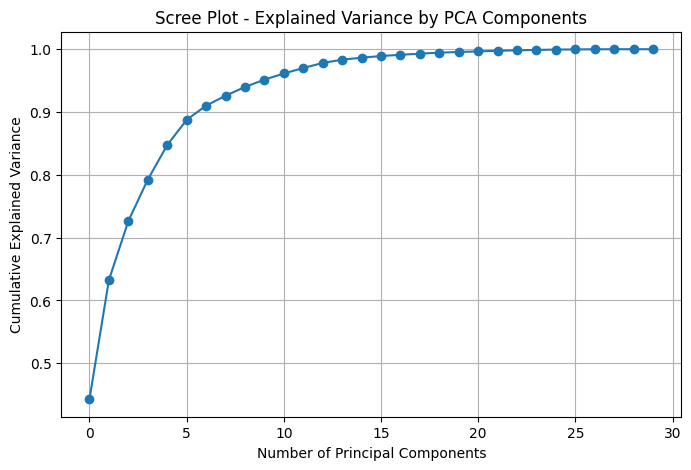

Accuracy on Original Data: 0.9591
Accuracy on PCA Transformed Data (95% variance): 0.9649


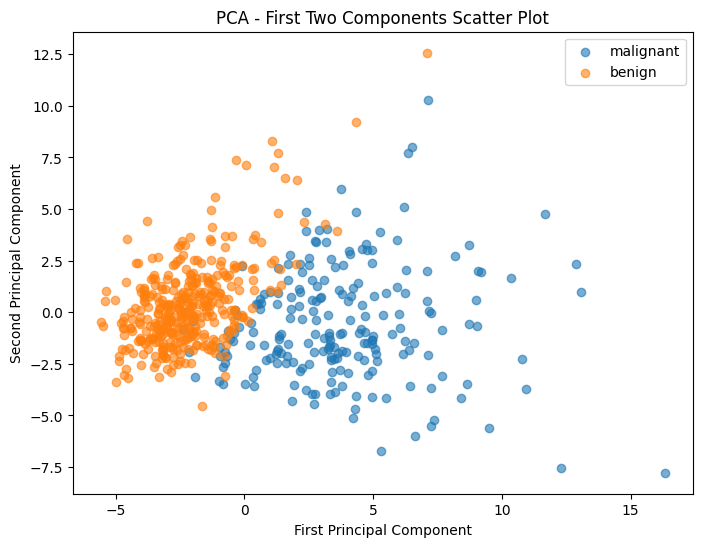

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot: explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Retain components that explain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

# Split original and PCA transformed data into train/test sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42)

# Train KNN on original data
knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test, y_pred_orig)

# Train KNN on PCA transformed data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f'Accuracy on Original Data: {acc_orig:.4f}')
print(f'Accuracy on PCA Transformed Data (95% variance): {acc_pca:.4f}')

# Visualize first two principal components
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=data.target_names[label], alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Components Scatter Plot')
plt.legend()
plt.show()

**Question 9:KNN Regressor with Distance Metrics and K-Value Analysis Task:**

1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).

2. Train a KNN regressor with:

    a. Euclidean distance (K=5)
    
    b. Manhattan distance (K=5)
    
    c. Compare Mean Squared Error (MSE) for both.
    
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

MSE with Euclidean distance (K=5): 4803.9056
MSE with Manhattan distance (K=5): 5210.2258


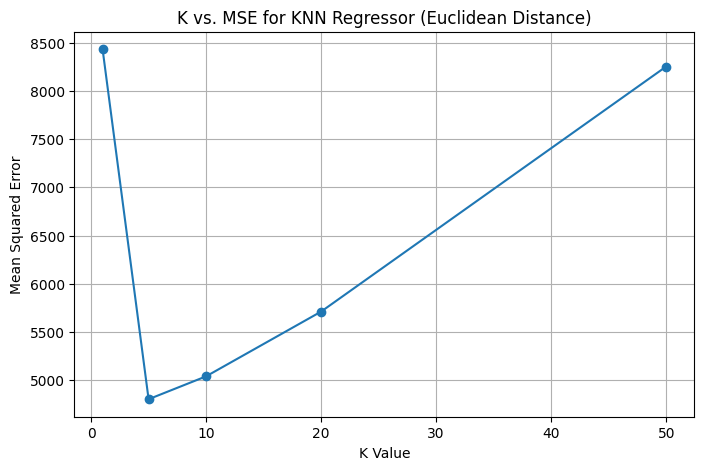

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN regressor with Euclidean distance (default metric)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Train KNN regressor with Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print(f'MSE with Euclidean distance (K=5): {mse_euclidean:.4f}')
print(f'MSE with Manhattan distance (K=5): {mse_manhattan:.4f}')

# Test different K values and plot K vs MSE
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.title('K vs. MSE for KNN Regressor (Euclidean Distance)')
plt.grid(True)
plt.show()